In [503]:
# import the relevant libraries
import requests
import json

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

### Properties

In [504]:
#read the properties csv using the pandas read_csv() method
properties_raw_data = pd.read_csv("C:\\Users\\Admin\\Documents\\properties.csv", index_col = 0)

In [505]:
# here are the data types
properties_raw_data.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

### Customers

In [506]:
#read the properties csv using the pandas read_csv() method
customers_raw_data = pd.read_csv("C:\\Users\\Admin\\Documents\\customers.csv", index_col = 0)

In [507]:
customers_raw_data.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

# Data Cleaning and Preprocessing

## Properties

In [508]:
properties = properties_raw_data.copy()

In [509]:
properties.describe(include='all')

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [510]:
print(properties.dtypes)

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object


In [511]:
properties.columns.array

<NumpyExtensionArray>
[  '\ufeffid',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

In [512]:

properties = properties.rename(columns= {'\ufeffid':'id'})

properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [513]:
properties['id'] = properties['id'].astype(str)
properties['id']

0      1030
1      1029
2      2002
3      2031
4      1049
       ... 
262    5044
263    5047
264    5048
265    5050
266    5051
Name: id, Length: 267, dtype: object

In [514]:
properties['building'] = properties['building'].astype(str)
properties['property#'] = properties['property#'].astype(str)
properties.dtypes

id             object
building       object
date_sale      object
type           object
property#      object
area          float64
price          object
status         object
customerid     object
dtype: object

In [515]:
properties.describe(include='all')

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,267,267,267,267.000000,267,267,195
unique,240,5,44,2,59,NaN,266,2,162
top,5041,3,#NUM!,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,72,259,7,NaN,2,195,9
mean,NaN,NaN,NaN,NaN,NaN,936.221311,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,284.894858,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1121.950000,NaN,NaN,NaN


In [516]:
properties['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [517]:

properties['date_sale'] = np.where(properties['date_sale']=='#NUM!', pd.NA, properties['date_sale'])
properties['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', <NA>, '9/1/2005', '7/1/2005'], dtype=object)

In [518]:
properties['date_sale'] = pd.to_datetime(properties['date_sale'])
properties['date_sale']

0     2005-11-01
1     2005-10-01
2     2007-07-01
3     2007-12-01
4     2004-11-01
         ...    
262          NaT
263          NaT
264          NaT
265          NaT
266          NaT
Name: date_sale, Length: 267, dtype: datetime64[ns]

In [519]:
# properties.describe(include="all", datetime_is_numeric=True)

In [520]:
properties['date_sale'] = properties['date_sale'].astype('int64')  # Convert to timestamp
properties.describe(include="all")

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,2.670000e+02,267,267,267.000000,267,267,195
unique,240,5,NaN,2,59,NaN,266,2,162
top,5041,3,NaN,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,NaN,259,7,NaN,2,195,9
mean,NaN,NaN,-1.637822e+18,NaN,NaN,936.221311,NaN,NaN,NaN
std,NaN,NaN,4.618059e+18,NaN,NaN,284.894858,NaN,NaN,NaN
min,NaN,NaN,-9.223372e+18,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,-9.223372e+18,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,1.157069e+18,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,1.180656e+18,NaN,NaN,1121.950000,NaN,NaN,NaN


In [521]:
properties['type'].unique()

array(['Apartment', 'Office'], dtype=object)

In [522]:

properties['type'] = properties['type'].str.lower()

In [523]:
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,1130803200000000000,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,1128124800000000000,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,1183248000000000000,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,1196467200000000000,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,1099267200000000000,apartment,49,1375.45,"$467,083.31",Sold,C0014


In [524]:
properties.dtypes

id             object
building       object
date_sale       int64
type           object
property#      object
area          float64
price          object
status         object
customerid     object
dtype: object

In [525]:
properties['price$'] = properties['price'].str.strip('$')
properties.head()

properties['price$'] = properties['price'].str.strip('$')
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,1130803200000000000,apartment,30,743.09,"$246,172.68",Sold,C0028,"246,172.68"
1,1029,1,1128124800000000000,apartment,29,756.21,"$246,331.90",Sold,C0027,"246,331.90"
2,2002,2,1183248000000000000,apartment,2,587.28,"$209,280.91",Sold,C0112,"209,280.91"
3,2031,2,1196467200000000000,apartment,31,1604.75,"$452,667.01",Sold,C0160,"452,667.01"
4,1049,1,1099267200000000000,apartment,49,1375.45,"$467,083.31",Sold,C0014,"467,083.31"


In [526]:

properties['price$']= properties['price$'].replace(",","",regex=True) 

properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,1130803200000000000,apartment,30,743.09,"$246,172.68",Sold,C0028,246172.68
1,1029,1,1128124800000000000,apartment,29,756.21,"$246,331.90",Sold,C0027,246331.90
2,2002,2,1183248000000000000,apartment,2,587.28,"$209,280.91",Sold,C0112,209280.91
3,2031,2,1196467200000000000,apartment,31,1604.75,"$452,667.01",Sold,C0160,452667.01
4,1049,1,1099267200000000000,apartment,49,1375.45,"$467,083.31",Sold,C0014,467083.31


In [527]:
# now we can carry on with casting price into a float
properties['price$'] = properties['price$'].astype(float)

In [528]:
# I believe we can now safely drop price from our dataframe
properties = properties.drop(['price'],axis=1)
properties.head()

,id,building,date_sale,type,property#,area,status,customerid,price$
0,1030,1,1130803200000000000,apartment,30,743.09,Sold,C0028,246172.68
1,1029,1,1128124800000000000,apartment,29,756.21,Sold,C0027,246331.90
2,2002,2,1183248000000000000,apartment,2,587.28,Sold,C0112,209280.91
3,2031,2,1196467200000000000,apartment,31,1604.75,Sold,C0160,452667.01
4,1049,1,1099267200000000000,apartment,49,1375.45,Sold,C0014,467083.31


In [529]:
properties.dtypes

id             object
building       object
date_sale       int64
type           object
property#      object
area          float64
status         object
customerid     object
price$        float64
dtype: object

In [530]:
properties['status'].unique()

array([' Sold ', '-'], dtype=object)

In [531]:
# To ensure uniformity and ease of analysis, we'll remove the surrounding spaces using the .strip() method 
# and convert the text to lowercase.
properties['status'] = properties['status'].str.strip()
properties['status'] = properties['status'].str.lower()

# Let's examine the unique values again to confirm our changes.
properties['status'].unique()

array(['sold', '-'], dtype=object)

In [532]:
properties = properties.rename(columns= {'status':'sold'})

# The symbol '-' likely represents properties not yet sold.

# Currently, we have two statuses: 'sold' and '-'. However, using a dash to represent unsold properties is somewhat unusual.

# A more intuitive approach might be to rename the 'status' column as 'sold' and change its values to 1s (for sold properties)
# and 0s (for unsold properties), essentially creating a binary classification.

properties = properties.rename(columns= {'status':'sold'})



In [533]:
# To implement this, we can use the .map() method. This method is often used in data science to provide a numeric representation
# of categorical data, allowing mathematical operations.Like .rename(), .map() is applied to a Series and takes a dictionary 
# as an argument, where the keys represent the original values and the dictionary values are the new values.
# Unlike '.rename()', however, we need to specify all distinct options as keys. 
# Any options not explicitly mapped will be transformed into NaN.

properties['sold'] = properties['sold'].map({'sold':1,'-':0})
# Let's view the unique values in 'sold' to confirm our transformations.
properties['sold'].unique()

array([1, 0], dtype=int64)

In [534]:
properties.dtypes

id             object
building       object
date_sale       int64
type           object
property#      object
area          float64
sold            int64
customerid     object
price$        float64
dtype: object

In [535]:
# finally we can check for missing values
properties.isna().sum()

# it seems there are none (apart from date of sale)
# to check if that's true, you can investigate each column with the .unique() method

# It's time to check for missing values in our cleaned dataset.
properties.isna().sum()

# From the initial glance, it seems there are no missing values, apart from the 'date_sale' column. 
# To be certain, you can verify this by inspecting each column with the .unique() method.

id             0
building       0
date_sale      0
type           0
property#      0
area           0
sold           0
customerid    72
price$         0
dtype: int64

In [536]:
# To wrap up the cleaning process, let's take a look at our final, tidied dataset.
properties

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,1130803200000000000,apartment,30,743.09,1,C0028,246172.68
1,1029,1,1128124800000000000,apartment,29,756.21,1,C0027,246331.90
2,2002,2,1183248000000000000,apartment,2,587.28,1,C0112,209280.91
3,2031,2,1196467200000000000,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,1099267200000000000,apartment,49,1375.45,1,C0014,467083.31
...,...,...,...,...,...,...,...,...,...
262,5044,5,-9223372036854775808,apartment,44,1238.58,0,NaN,322610.74
263,5047,5,-9223372036854775808,apartment,47,794.52,0,NaN,279191.26
264,5048,5,-9223372036854775808,apartment,48,1013.27,0,NaN,287996.53
265,5050,5,-9223372036854775808,apartment,50,1074.71,0,NaN,365868.78


## Customers

In [537]:
# For convenience and to avoid having to scroll up every time, let's create a copy of the raw customer data.
customers = customers_raw_data.copy()

In [538]:
customers.columns.array

# Without further examination of the file, we'll commence by scrutinizing the column structure.
# We already suspect that pandas might have interpreted the JSON format in an unusual manner.
#customers.columns.values

<NumpyExtensionArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [539]:
# rename customerid in an appropriate way
customers = customers.rename(columns= {'\ufeffcustomerid':'customerid'})
customers.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [540]:
# Let's get an overview of our data. First, we'll examine the descriptive statistics of all variables.
customers.describe(include="all")

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [541]:
# Next, let's check the data types of our variables.
customers.dtypes

customerid           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [542]:
# A glance at the top of the table suggests the presence of missing values, so we need to verify this.
customers.isna().sum()


customerid           0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [543]:
# We'll start by renaming 'entity' and 'purpose' to names that could potentially represent an indicator variable.
customers = customers.rename(columns= {'entity':'individual'})
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [544]:
# Next, let's focus on the 'individual' variable and observe its unique values.
customers['individual'].unique()

array(['Individual', 'Company'], dtype=object)

In [545]:
# To make 'individual' a Boolean-like variable (at least conceptually), let's map 'Individual' to 1 and 'Company' to 0.
customers['individual'] = customers['individual'].map({'Individual':1,'Company':0})

In [546]:
# Now, let's examine the 'sex' variable.
customers['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [547]:
customers['sex'] = customers['sex'].map({'F':'1','M':'0', '':pd.NA})

In [548]:
# Let's verify the missing data.
customers.isna().sum()

customerid           0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [549]:
customers['purpose'] = customers['purpose'].str.lower()
customers['source'] = customers['source'].str.lower()

# Let's have a look at the changes.
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,Yes,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,No,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,Yes,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,No,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,No,website


In [550]:
# Now, let's move on to 'mortgage'. We'll map 'No' to 0 and 'Yes' to 1.
customers['mortgage'] = customers['mortgage'].map({'No':0,'Yes':1})

# Let's see how the dataframe looks now.
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website


In [551]:
# Lastly, let's check for any missing values.
customers.isna().sum()

customerid           0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [552]:
customers['full_name'] = customers['name'] + " " + customers['surname']

# Now, let's check how our dataframe looks.
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


In [553]:
customers = customers.drop(['name', 'surname'], axis=1)

# Let's take a look at the dataframe now.
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


In [554]:
customers['birth_date'] = pd.to_datetime(customers['birth_date'])

# Let's check the dataframe one more time.
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [555]:
# Finally, let's take a look at the datatypes of our columns to confirm the changes.
customers.dtypes

customerid                   object
individual                    int64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction             int64
mortgage                      int64
source                       object
full_name                    object
dtype: object

In [556]:
# Let's review the status of missing values post-preprocessing.
customers.isna().sum()

customerid           0
individual           0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
full_name            0
dtype: int64

In [557]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


## Combine the two tables

In [558]:
properties.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,1130803200000000000,apartment,30,743.09,1,C0028,246172.68
1,1029,1,1128124800000000000,apartment,29,756.21,1,C0027,246331.90
2,2002,2,1183248000000000000,apartment,2,587.28,1,C0112,209280.91
3,2031,2,1196467200000000000,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,1099267200000000000,apartment,49,1375.45,1,C0014,467083.31


In [559]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [560]:
pd.merge(properties, customers, on='customerid', how='left')

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,1130803200000000000,apartment,30,743.09,1,C0028,246172.68,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,1128124800000000000,apartment,29,756.21,1,C0027,246331.90,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,1183248000000000000,apartment,2,587.28,1,C0112,209280.91,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,1196467200000000000,apartment,31,1604.75,1,C0160,452667.01,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,1099267200000000000,apartment,49,1375.45,1,C0014,467083.31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,-9223372036854775808,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,-9223372036854775808,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,-9223372036854775808,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,-9223372036854775808,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [561]:
# The merge did not work as intended.
# There probably is a problem with the key, so we will investigate further.
properties.customerid.unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [562]:
customers.customerid.unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [563]:
# Let's trim the unnecessary white space from 'customerid' in the properties dataframe.
properties['customerid'] = properties['customerid'].str.strip()

# Although there's no noticeable issue with the customers dataframe, we'll trim the 'customerid' column to maintain consistency.
customers['customerid'] = customers['customerid'].str.strip()

In [564]:
# To ensure a successful merge, we must ensure that 'customerid' in the customers table has only unique values.
# Here's the total count of entries in the customers dataframe.
customers.count()

customerid           162
individual           162
birth_date           155
sex                  155
country              162
state                154
purpose              162
deal_satisfaction    162
mortgage             162
source               162
full_name            162
dtype: int64

In [565]:
# Here's the count of unique entries in the 'customerid' column of the properties dataframe.
properties['customerid'].nunique()

162

In [566]:
properties['customerid'] = np.where(properties['customerid']=='', pd.NA, properties['customerid'])

In [567]:
# Let's rename our merged dataframe to 'real_estate_data' for clarity.
real_estate_data = pd.merge(properties, customers, on='customerid', how='left')

In [568]:
real_estate_data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,1130803200000000000,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,1128124800000000000,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,1183248000000000000,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,1196467200000000000,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,1099267200000000000,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [569]:
real_estate_data.tail()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
262,5044,5,-9223372036854775808,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,-9223372036854775808,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,-9223372036854775808,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,-9223372036854775808,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5051,5,-9223372036854775808,apartment,51,789.25,0,NaN,199216.40,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [570]:
real_estate_data.fillna(pd.NA)

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,1130803200000000000,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,1128124800000000000,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,1183248000000000000,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,1196467200000000000,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,1099267200000000000,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,-9223372036854775808,apartment,44,1238.58,0,<NA>,322610.74,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
263,5047,5,-9223372036854775808,apartment,47,794.52,0,<NA>,279191.26,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
264,5048,5,-9223372036854775808,apartment,48,1013.27,0,<NA>,287996.53,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
265,5050,5,-9223372036854775808,apartment,50,1074.71,0,<NA>,365868.78,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>


In [571]:
real_estate_data.dtypes

id                           object
building                     object
date_sale                     int64
type                         object
property#                    object
area                        float64
sold                          int64
customerid                   object
price$                      float64
individual                  float64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                    float64
source                       object
full_name                    object
dtype: object

# Statistics

In [572]:
# After finishing with cleaning and preprocessing, it's advisable to create a checkpoint. 
# We'll assign the cleaned and preprocessed data to a new variable 'data'.
data = real_estate_data.copy()

In [573]:
# Let's inspect the first few rows of our processed data.
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,1130803200000000000,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,1128124800000000000,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,1183248000000000000,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,1196467200000000000,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,1099267200000000000,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [574]:
# As we're transitioning into the statistical analysis phase, running descriptive statistics would be particularly helpful.
data.describe()

,date_sale,area,sold,price$,individual,birth_date,deal_satisfaction,mortgage
count,2.670000e+02,267.000000,267.000000,267.000000,195.000000,178,195.000000,195.000000
mean,-1.637822e+18,936.221311,0.730337,281171.901386,0.912821,1961-01-08 11:35:43.820224704,3.600000,0.317949
min,-9.223372e+18,410.710000,0.000000,117564.070000,0.000000,1931-02-13 00:00:00,1.000000,0.000000
25%,-9.223372e+18,756.210000,0.000000,217553.055000,1.000000,1951-05-04 06:00:00,3.000000,0.000000
50%,1.157069e+18,798.280000,1.000000,249075.660000,1.000000,1962-09-23 00:00:00,4.000000,0.000000
75%,1.180656e+18,1121.950000,1.000000,326964.855000,1.000000,1970-07-09 06:00:00,5.000000,1.000000
max,1.272672e+18,1942.500000,1.000000,538271.740000,1.000000,1986-06-21 00:00:00,5.000000,1.000000
std,4.618059e+18,284.894858,0.444618,89119.121005,0.282824,NaN,1.340872,0.466878


In [575]:
# Given that we've now entered the statistical analysis phase, 
# obtaining a comprehensive set of descriptive statistics will be immensely beneficial.
# data.describe(include="all", datetime_is_numeric = True)
data['date_sale'] = properties['date_sale'].astype('int64')  # Convert to timestamp
data.describe(include="all")

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267,2.670000e+02,267,267,267.000000,267.000000,195,267.000000,195.000000,178,178,195,181,195,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,162,NaN,NaN,NaN,2,9,9,2,NaN,NaN,3,162
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN,NaN,NaN,0,USA,California,home,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,9,NaN,NaN,NaN,108,165,120,119,NaN,NaN,119,9
mean,NaN,NaN,-1.637822e+18,NaN,NaN,936.221311,0.730337,NaN,281171.901386,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,NaN,-9.223372e+18,NaN,NaN,410.710000,0.000000,NaN,117564.070000,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,-9.223372e+18,NaN,NaN,756.210000,0.000000,NaN,217553.055000,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,1.157069e+18,NaN,NaN,798.280000,1.000000,NaN,249075.660000,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,1.180656e+18,NaN,NaN,1121.950000,1.000000,NaN,326964.855000,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,1.272672e+18,NaN,NaN,1942.500000,1.000000,NaN,538271.740000,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


## Breakdowns by building

We can examine:
1. Breakdown of totals by building (frequency distribution by building)
2. Breakdown of averages by building

In [576]:
# Let's identify the unique buildings in our dataset.
data['building'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [577]:
data.groupby('building')

In [578]:
#data.groupby('building').sum()
# Exclude datetime columns by selecting only numeric columns
numeric_data = data.select_dtypes(exclude=['datetime'])

# Perform the groupby sum operation on numeric columns only
result = numeric_data.groupby('building').sum()
print(result)

                                                         id  \
building                                                      
1         1030102910491031103610461047102610251018103210...   
2         2002203120362056200720042006205420432050204420...   
3         3011302630233020302930153033302730313034301630...   
4         4023403540054006401340244012405140414018403040...   
5         5051501350355033504050165027502850255039503050...   

                    date_sale  \
building                        
1        -4009733021128654848   
2        -1737239457983430656   
3         7182436578871345152   
4         8830340726290448384   
5        -4842372110564327424   

                                                       type  \
building                                                      
1         apartmentapartmentapartmentapartmentapartmenta...   
2         apartmentapartmentapartmentapartmentapartmenta...   
3         apartmentapartmentapartmentapartmentapartmenta...   
4         a

### Breakdown of totals by building

In [579]:
# For a more structured approach to this problem, let's create a variable to hold the columns of interest.
# This variable will include the column we want to group by and the columns we wish to aggregate.
# It would be informative to observe the total number of properties sold 
# and those under mortgage per building - these would represent total counts.
# Alternatively, we could examine the average area, price, and deal satisfaction by building.

# Let's commence with deriving total counts per building.
columns_of_interest = ['building', 'sold','mortgage']

# Now we will create a new variable to hold the total counts grouped by building.
totals_by_building = data[columns_of_interest].groupby("building").sum()
totals_by_building 

# Note that 'mortgage' here is a float, a side effect of the 'merge' operation we performed earlier.
# While this doesn't affect our results, it's an interesting observation. You may recast it to int64 if you prefer.

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


### Breakdown of averages by building

In [580]:
# Now let's focus on deriving average values. Here is the relevant list of columns.
# Notice that we are overwriting the 'columns_of_interest' variable.
# There are different ways to tackle this issue. 
# I've chosen to use this variable as a temporary holder of the list of columns of interest
# for the given groupby operation. This is one of the simplest approaches.
# If you feel uneasy about it, you can skip using this variable and directly list the relevant columns
# in the .groupby() operation line itself.
columns_of_interest = ['building', 'area', 'price$', 'deal_satisfaction']

# Let's now create a new variable to hold the average values grouped by building.
averages_by_building = data[columns_of_interest].groupby("building").mean()
averages_by_building

,area,price$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


## Breakdowns by country and state

Country
1. Breakdown of totals by country (frequency distribution by country)
2. Breakdown of averages by country

State
3. Frequency distribution by state
4. Relative frequency by state
5. Cumulative frequency by state

### Breakdown of totals by country

In [581]:
# While attempting to break down the data by country, we notice a duplication of the USA entries.
# It's logical to use the same 'columns_of_interest' as before for the totals.
# This is because we've already reasoned out which totals are meaningful, regardless of what we aggregate on.
# The only adjustment required is to substitute 'building' with 'country'.

columns_of_interest = ['country', 'sold','mortgage']
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [582]:
data['country'].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [583]:
object_columns = data.select_dtypes(['object']).columns
object_columns

Index(['id', 'building', 'type', 'property#', 'customerid', 'sex', 'country',
       'state', 'purpose', 'source', 'full_name'],
      dtype='object')

In [584]:
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [585]:
# Now we've achieved a much cleaner data set!
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


### Breakdown of averages by country
Based on what you have seen before for the breakdowns by bulding and by state, please find the breakdown by country of the columns 'area', 'deal_satisfaction', and 'price$'

In [586]:
# For the average computations, we use the following list of columns.
columns_of_interest = ['country', 'area', 'deal_satisfaction','price$']

# We create a new variable where we will store the data relevant to our calculations.
averages_by_country = data[columns_of_interest].groupby("country").mean()
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


### Frequency distribution by state

In [587]:
columns_of_interest = ['state', 'sold','mortgage']
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,11,3.0
California,120,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [588]:
totals_by_state.sold.sum()

181

In [589]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


In [590]:
data['state'] = np.where(data['state']=='', pd.NA, data['state'])
data['state'] = np.where(data['country']!='USA', pd.NA, data['state'])

In [591]:
# here's the new result
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,9,3.0
California,118,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [592]:
totals_by_state.sold.sum()

177

In [593]:
# To focus on the relative and cumulative frequency of sales, we can refine our table by state.
# We will start by excluding 'mortgage' from our columns of interest.
columns_of_interest = ['state', 'sold']

# We will store this data in a new variable called 'sold_by_state'.
sold_by_state = data[columns_of_interest].groupby("state").sum()
sold_by_state

,sold
state,
Arizona,9
California,118
Colorado,11
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


In [594]:
# To get a clearer picture, we can sort the values in descending order. This will place the states with the highest sales on top.
sold_by_state = sold_by_state.sort_values('sold', ascending=False)
sold_by_state

,sold
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [595]:
# The term 'sold' may not be the best to describe frequency, so we can rename this column.
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


### Relative frequency distribution by state
1. Add a new column to the 'sold_by_state' data frame, called 'relative_frequency' which contains the relative frequency of the different states.
2. Add a new column to the 'sold_by_state' data frame, called 'cumulative_frequency' which contains the cumulative frequency of the different states. You can use your own tools to achieve this, or look up the .cumsum() method here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html

In [596]:
# The relative frequency can be computed by dividing the frequency of each state by the total frequency.
sold_by_state['relative_frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative_frequency
state,,
California,118,0.666667
Nevada,17,0.096045
Colorado,11,0.062147
Oregon,11,0.062147
Arizona,9,0.050847
Utah,5,0.028249
Virginia,4,0.022599
Kansas,1,0.005650
Wyoming,1,0.005650


In [597]:
# Cumulative frequency can be obtained using the 'cumsum()' function in pandas.
# This function calculates the cumulative sum of values in a Series.
# Applying this on our relative frequency column provides us with the cumulative frequency.
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


# Data Analysis

## Customers Age

In [598]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,1130803200000000000,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,1128124800000000000,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,1183248000000000000,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,1196467200000000000,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,1099267200000000000,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [599]:
# Let's calculate the age of our buyers at the time of purchase.
# This can be done by subtracting the birth date from the sale date.

# Convert columns to datetime
data['date_sale'] = pd.to_datetime(data['date_sale'], errors='coerce')
data['birth_date'] = pd.to_datetime(data['birth_date'], errors='coerce')

# Check the types to confirm
print(data.dtypes)

data['age_at_purchase'] = data['date_sale'] - data['birth_date']
data['age_at_purchase']


id                           object
building                     object
date_sale            datetime64[ns]
type                         object
property#                    object
area                        float64
sold                          int64
customerid                   object
price$                      float64
individual                  float64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                    float64
source                       object
full_name                    object
dtype: object


0     7073 days
1     8255 days
2     7856 days
3     8009 days
4     9302 days
         ...   
262         NaT
263         NaT
264         NaT
265         NaT
266         NaT
Name: age_at_purchase, Length: 267, dtype: timedelta64[ns]

In [600]:
# timedelta has different attributes than normal dates, which you can explore in the docs
# for our purposes, we want the age in integers, so we can work with it
# to access the number of days stored inside, we can use the attribute 'days'

#data['age_at_purchase'][0].days
type(data['age_at_purchase'][0].days)

int

In [601]:

# It's important to note that the 'age_at_purchase' field we've just created is of timedelta datatype.
# A timedelta object represents a duration, the difference between two dates or times.
# For our analysis, we need the age in integers or floats for better manipulation.
# To convert it, we use the 'days' attribute to extract the number of days, as timedelta measures duration in days.

data['age_at_purchase'] = data['age_at_purchase'].apply(lambda x: x.days)
data['age_at_purchase']

# Notice that the datatype is float64, which may be due to how pandas internally manages timedelta objects.

0      7073.0
1      8255.0
2      7856.0
3      8009.0
4      9302.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [602]:
# To obtain the age in years at the time of purchase, we can divide the 'age_at_purchase' field by 365.
# This may not be perfectly accurate due to leap years, but it should be close enough for our analysis.
data['age_at_purchase'] = data['age_at_purchase']/365
data['age_at_purchase']

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [603]:
# Since age is typically represented in whole numbers, we can round down the values using np.floor().
data['age_at_purchase_rounded'] = data['age_at_purchase'].apply(lambda x: np.floor(x))
data['age_at_purchase_rounded']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase_rounded, Length: 267, dtype: float64

### Create age intervals

In [604]:
# Note that we retain the original values when calculating statistics, as they are more precise.
# To divide age into different intervals, we can use the 'cut' method from pandas.
# This function segments and sorts the data values into bins we specify.
# Here, we're dividing the 'age_at_purchase' into 10 bins and setting the decimal precision to 0.
print(data.columns)
data['age_interval'] = pd.cut(data['age_at_purchase'], bins = 10, precision = 0)
data['age_interval']

Index(['id', 'building', 'date_sale', 'type', 'property#', 'area', 'sold',
       'customerid', 'price$', 'individual', 'birth_date', 'sex', 'country',
       'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source',
       'full_name', 'age_at_purchase', 'age_at_purchase_rounded'],
      dtype='object')


0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 31.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 31.0] < (31.0, 36.0] < (36.0, 42.0] ... (54.0, 59.0] < (59.0, 65.0] < (65.0, 71.0] < (71.0, 76.0]]

### Breakdown by age interval

In [605]:
columns_of_interest = ['age_interval', 'sold']
sold_by_age = data[columns_of_interest].groupby("age_interval").sum()
sold_by_age

C:\Users\Admin\AppData\Local\Temp\ipykernel_12512\4225632607.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_by_age = data[columns_of_interest].groupby("age_interval").sum()


,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


## Analysis of the price of properties

### Price interval

In [606]:
# To create 'price_interval', we adopt a similar process to that of 'age_interval'.
# We segment and sort the 'price$' values into 10 bins.
data['price_interval'] = pd.cut(data['price$'], bins=10)
data['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

### Total number of properties

In [607]:
# Now, we want to count the total number of properties for each price interval.
columns_of_interest = ['price_interval', 'sold']
all_properties_by_price = data[columns_of_interest].groupby("price_interval").count()

# Here, 'sold' simply represents a count, so it's more fitting to rename the column as 'count'.
all_properties_by_price = all_properties_by_price.rename(columns={'sold':'count'})
all_properties_by_price

C:\Users\Admin\AppData\Local\Temp\ipykernel_12512\2746255200.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_properties_by_price = data[columns_of_interest].groupby("price_interval").count()


,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


### Total number of sold properties

In [608]:
# For the sold properties, we will count the number of properties sold for each price interval.
# Here, we use the 'sum()' function with 'groupby' as 'sold' here indeed represents properties sold.
columns_of_interest = ['price_interval', 'sold']
sold_properties_by_price = data[columns_of_interest].groupby("price_interval").sum()
sold_properties_by_price

C:\Users\Admin\AppData\Local\Temp\ipykernel_12512\3643276466.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_properties_by_price = data[columns_of_interest].groupby("price_interval").sum()


,sold
price_interval,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


### Total number of not sold properties

In [609]:
# To identify properties that remain unsold, we can subtract the sold properties from the total count.
# We store this in a new column named 'not_sold' in the original dataframe.
all_properties_by_price['not_sold'] = all_properties_by_price['count'] - sold_properties_by_price['sold']
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold,sold
price_interval,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


## Relationship between age and price

In [610]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(243776.371, 285847.138]"
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(327917.905, 369988.672]"


### Filter out only the sold apartments

In [611]:
# Next, let's filter out the properties that have been sold.
# This will be done in a new variable by filtering the 'sold' column for the value of 1.
data_sold = data[data['sold']==1]

In [612]:
# Further, let's exclude any company data, focusing only on individual sales.
data_sold = data_sold[data_sold['individual']==1]

In [613]:
# Now, let's narrow our focus to the 'age_at_purchase' and 'price$' columns.
data_sold[['age_at_purchase','price$']]

# Be aware that some observations may not have an 'age' value as the data comes from companies.

,age_at_purchase,price$
0,19.378082,246172.68
1,22.616438,246331.90
2,21.523288,209280.91
3,21.942466,452667.01
4,25.484932,467083.31
...,...,...
173,70.846575,204292.49
174,72.849315,261579.89
175,73.038356,222867.42
176,72.778082,291494.36


### Covariance of age and price

In [614]:
# Let's calculate the covariance of 'age_at_purchase' and 'price$'.
# Covariance doesn't provide an intuitively understandable value, however, it's useful in statistical analysis.
np.cov(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.68344293e+02, -1.77726142e+05],
       [-1.77726142e+05,  6.16619957e+09]])

### Correlation of age and price

In [615]:
np.corrcoef(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.        , -0.17443889],
       [-0.17443889,  1.        ]])

In [616]:
data_sold_no_na = data_sold.dropna()
np.corrcoef(data_sold_no_na['age_at_purchase'], data_sold_no_na['price$'])#, ddof=1)

array([[ 1.        , -0.19574621],
       [-0.19574621,  1.        ]])

In [617]:
# As an alternative, we can use the correlation method provided by pandas, which gives the same result.
data_sold_no_na[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.195746
price$,-0.195746,1.000000


In [618]:
# Interestingly, pandas also handles NA values in its calculations, resulting in different values compared to our cleaned dataset. 
# This discrepancy arises because pandas employs distinct strategies for NA handling, rather than outright removal (as in dropna()).
data_sold[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


In [619]:
# Note: Using the original data (which includes NA values) for correlation calculation would give the same result as the 'data_sold' dataset.
data[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


# Data visualization

## Deal Satisfaction Across Countries (Bar Chart)

1. To plot the deal satisfaction by country, we must first obtain the relevant data. There needs to be a breakdown of deal satisfaction by country.
2. With the data we can create a bar chart with the following parameters: 
    - white background with a grid
    - size of the figure (12,6)
    - fitting color which is not the default one
    - rotated x ticks, with a font size of 13
    - y ticks, with a font size of 13
    - y label for the deal satisfaction (no need for an x label)
    - remove the top and the right border of the chart
    - save the newly created figure as a .png on your computer

We will maintain these visualization parameters for all subsequent charts in order to ensure consistency and comparability across the different visualizations.

In [620]:
# we have already calculate the averages by country so we can take advantage of that
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


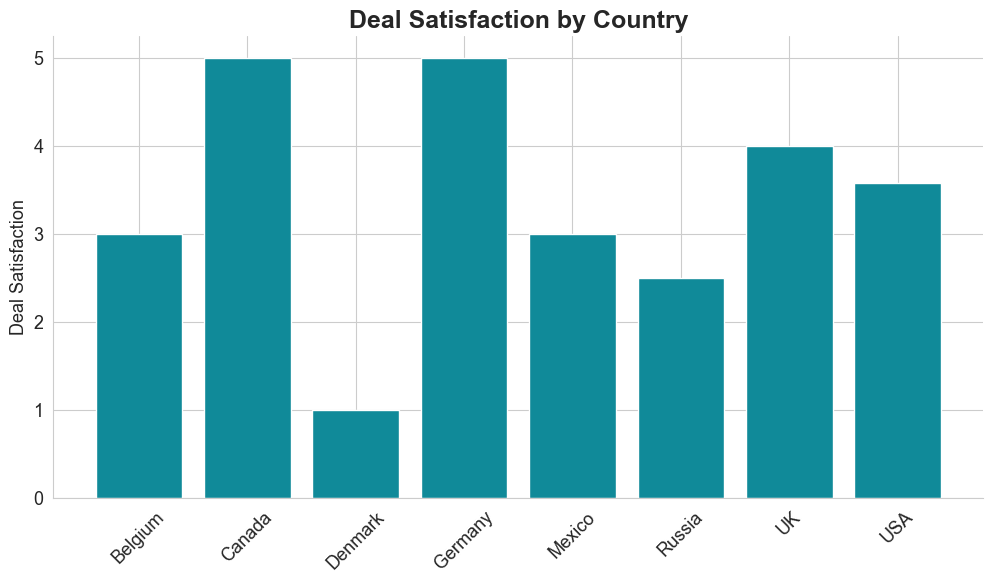

In [621]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) #determine the size of the chart

plt.bar(x = averages_by_country.index, #specify the x axis
        height = averages_by_country['deal_satisfaction'], #specify the y axis
        color = "#108A99") # the color for the bars (365 Data Science color)
# format the ticks
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.title("Deal Satisfaction by Country", fontsize = 18, fontweight = "bold") #add and format the title for the chart
plt.ylabel("Deal Satisfaction", fontsize = 13 ) #add a title for the y-axis

sns.despine() # removes the top and right border of our graph

plt.savefig("deal_satisfaction_by_country_bar_chart.png") # you can export your chart as a picture

plt.show()

##  Customer Age Distribution (Histogram) (Histogram)

1. Тo visualize the distribution of customer ages at the time of purchase, we'll generate a histogram. The necessary data for this visualization is already included in the data variable.
2. Histogram construction: We use the <strong>data</strong> variable to create a histogram that represents the age distribution at purchase.The histogram should incorporate the following parameters:
    - white background with a grid
    - size of the figure (12,6)
    - 10 bins for the different categories
    - fitting color which is not the default one
    - appropriate x and y labels
    - remove the top and the right border of the chart
    - save the newly created figure as a .png on your computer

In [622]:
# let's get started by checking what our data is
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


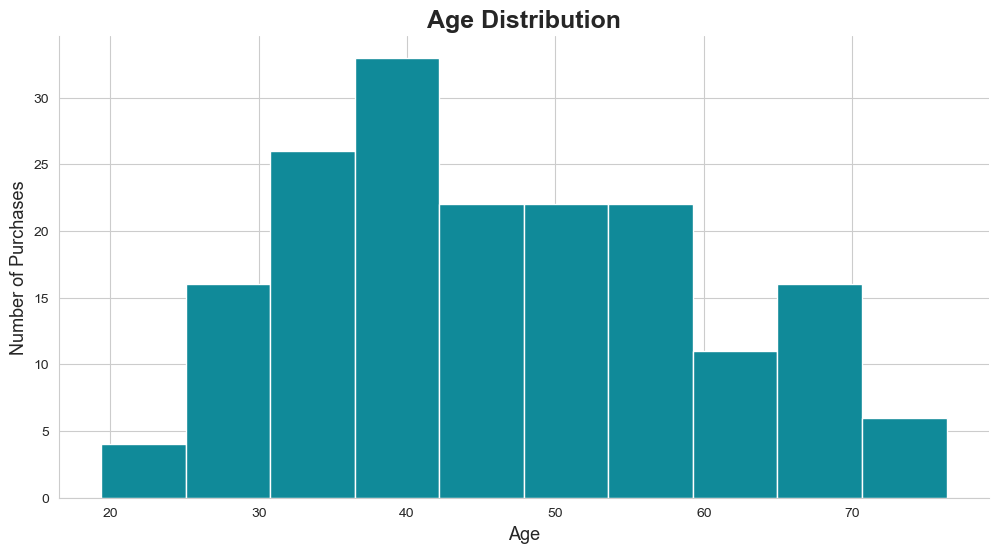

In [623]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) # determine the size of the figure

plt.hist(data['age_at_purchase'], # the variable on which to create the histogram
         bins = 10, # create a histogram with 10 bins
         color = "#108A99")
plt.title("Age Distribution", fontsize = 18, weight = "bold")
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Purchases", fontsize=13)

sns.despine() # removes the top and right border of our graph

plt.savefig("age_distribution_histogram.png") # you can export your chart as a picture

plt.show()

## Segmentation by State (Pareto diagram)

This is a Pareto diagram. The bars show the absolute frequency of each category. In this case this translates to: how many customers are there from each state. For example, there are 4 customers from Virginia.

The secondary axis (the orange line), shows the cumulative frequency. For example, California, Nevada, and Oregon together, account for 82% of all purchases. 

In [624]:
# we have already created such a table before
sold_by_state

# in fact, we have also sorted it by frequency

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


In [625]:
# we need to import the relevant library to plot the percentages on the second y-axis
from matplotlib.ticker import PercentFormatter

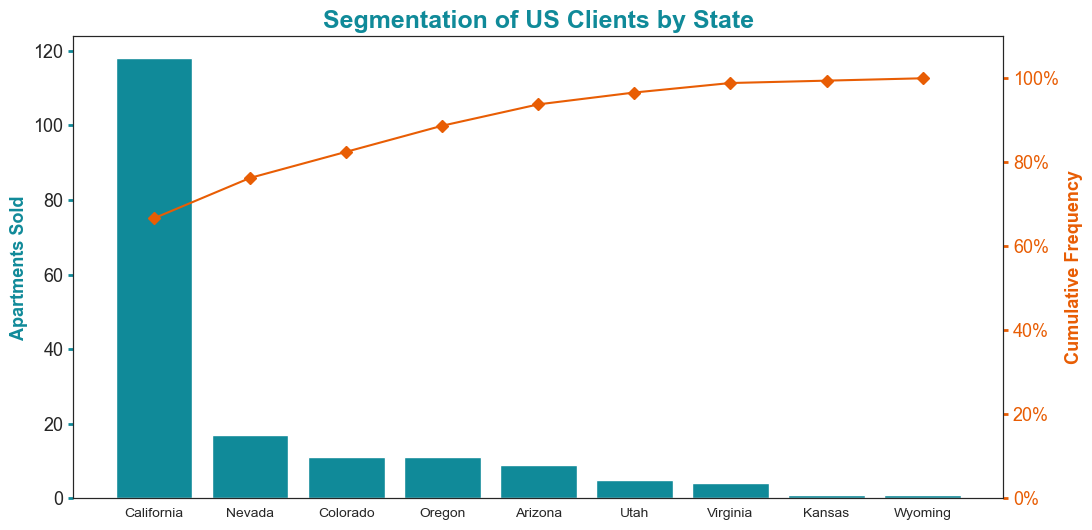

In [626]:
# Setting the seaborn style to "white" for aesthetic reasons - to override the default matplotlib style, removing the grey background and grid for a cleaner look.

sns.set_style("white") 

# To create the Pareto diagram, we first initiate a figure with two axes.
fig, ax = plt.subplots(figsize = (12, 6))

# The first part of our visualization is a bar chart, featuring the 'sold_by_state' index on the x-axis and the frequency on the y-axis.
ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color = "#108A99")
# Setting a descriptive y-axis label.
ax.set_ylabel("Apartments Sold", 
              weight='bold',
              fontsize = 13,
              color = "#108A99")
# Formatting the y-axis ticks.
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 13,
               color = "#108A99")

# Creating a second axis that shares the same x-axis as the first.
ax2 = ax.twinx()

# Setting the y-axis limit and formatting it to show percentages.
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

# The second part of our visualization is a line chart sharing the x-axis with the bar chart, and featuring the cumulative frequency on the y-axis.
ax2.plot(sold_by_state.index,
         sold_by_state["cumulative_frequency"], 
         color = "#E85D04", 
         marker = "D")
# Setting a descriptive y-axis label.
ax2.set_ylabel("Cumulative Frequency", 
               color = "#E85D04", 
               weight = "bold",
               fontsize=13)
# Formatting the y-axis ticks.
ax2.tick_params(axis = "y", 
                colors = "#E85D04", 
                width = 2, 
                labelsize = 13)

# Adding a descriptive and engaging title to our visualization.
ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#108A99")

# Saving the visualization as an image file.
plt.savefig("US_segmentation_by_state_pareto_diagram.png") 

# Displaying the final visualization.
plt.show()

## Total Sales per Year (Line chart)

In [627]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [628]:
# We need to create a line chart detailing total sales per year. However, our dataset doesn't currently contain a breakdown by year.
# Our dataset lacks a categorical variable representing the year of purchase, even though it does include timestamp information.

# In data analytics, it's common to backtrack and add in missing features that become necessary later on.

# We have previously processed the 'age at purchase' in a similar manner. The 'date_sale' column is currently in datetime format.
# To manipulate this data for our purposes, we need to convert the year portion of the date into an integer.
data['date_sale'][0].year

2005

In [629]:
# We do that for the whole series and save the year in a separate column
data['year_sale'] = data['date_sale'].apply(lambda x: x.year)
data['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [630]:
# We need to convert the 'year_sale' variable type from float to int as fractional years don't accurately represent our data.
# To modify the data type, we employ the 'astype' method. Since this function cannot handle missing values, we initially replace all NAs with zeros.
data['year_sale'] = data['year_sale'].fillna(0).astype(int)

# Subsequently, we convert all zeros back to NA, restoring our dataset's missing value representation.
data['year_sale'] = data['year_sale'].replace({0:pd.NA})


In [631]:
# Next, we formulate the desired sales breakdown by year.
# We choose the columns of interest, 'year_sale' and 'price$', and sum all sales for each year.
columns_of_interest = ['year_sale','price$']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()

# For clarity, we rename the 'price$' column to 'revenue$'.
revenue_per_year = revenue_per_year.rename(columns={'price$':'revenue$'})
revenue_per_year

,revenue$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


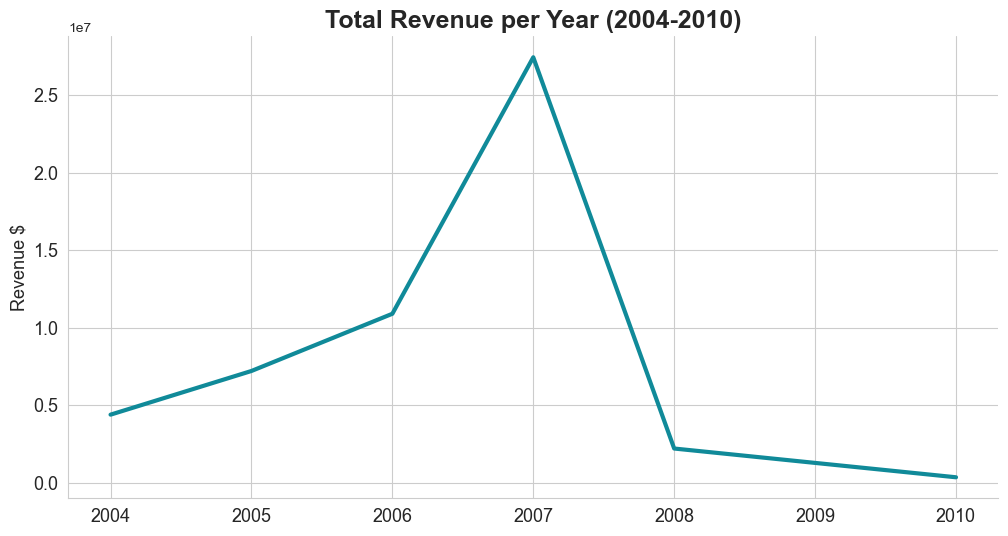

In [632]:
# Let's override the default matplotlib style, opting for a white grid layout.
sns.set_style("whitegrid")

# We'll generate a figure that aligns aesthetically with our other visualizations.
plt.figure(figsize = (12, 6))

# A line chart will be constructed to represent revenue per year.
plt.plot(revenue_per_year['revenue$'], 
         color='#108A99', 
         linewidth=3)

# Let's ensure our visualization includes essential chart elements like title, labels, and legends.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $", fontsize = 13)
plt.xticks(fontsize = 13) # We'll format and adjust the orientation of labels on the x-axis.
plt.yticks(fontsize = 13) # y-axis label formatting

sns.despine() # We'll remove the top and right borders of the chart for a cleaner look.

# Don't forget to save the visualization as an image file.
plt.savefig("total_revenue_per_year_in_M_line_chart.png")

plt.show() # Finally, display the visualization.

In [633]:
# Several issues detract from the effectiveness of our graph:
# 1. Revenue figures are displayed in scientific notation, which is not readily interpretable.
# 2. The year 2009 lacks its own tick mark, due to its absence from the revenue_per_year dataframe.

# Currently, revenue is represented in dollars, but the figures are large and overwhelming.
# For a cleaner, more comprehensible visualization, we should present revenue in thousands or millions.
# To simplify this, we'll create a new Series named 'revenue$inM'.
revenue_per_year['revenue$inM'] = revenue_per_year['revenue$'] / 1000000

In [634]:
revenue_per_year

,revenue$,revenue$inM
year_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [635]:
# To improve our data representation, we'll add a new data point for the year 2009.
# This year will display 0 revenue, reflecting the actual situation.
# This inclusion aids in presenting a more accurate reality.
revenue_per_year_adj = revenue_per_year.copy() 
data = {
    'revenue$': [4397009.80,7215232.41,10906000.58,27451798.34	,2212160.05,357538.20],
    'revenue$inM': [4.397010,7.215232,10.906001,27.451798,2.212160,0.357538]
}

# Create the original DataFrame.
revenue_per_year = pd.DataFrame(data, index=['2004', '2005', '2006', '2007', '2008', '2010'])

# Copy the original DataFrame to maintain its integrity.
revenue_per_year_adj = revenue_per_year.copy()

# Create a new DataFrame for the year 2009 with 0 revenue.
new_row = pd.DataFrame({'revenue$': [0], 'revenue$inM': [0]}, index=['2009'])

# Concatenate the new row for 2009 with the existing DataFrame.
revenue_per_year_adj = pd.concat([revenue_per_year_adj, new_row])

# Sort the DataFrame to arrange the years chronologically.
revenue_per_year_adj = revenue_per_year_adj.sort_index()

# Display the adjusted DataFrame.
print(revenue_per_year_adj)

         revenue$  revenue$inM
2004   4397009.80     4.397010
2005   7215232.41     7.215232
2006  10906000.58    10.906001
2007  27451798.34    27.451798
2008   2212160.05     2.212160
2009         0.00     0.000000
2010    357538.20     0.357538


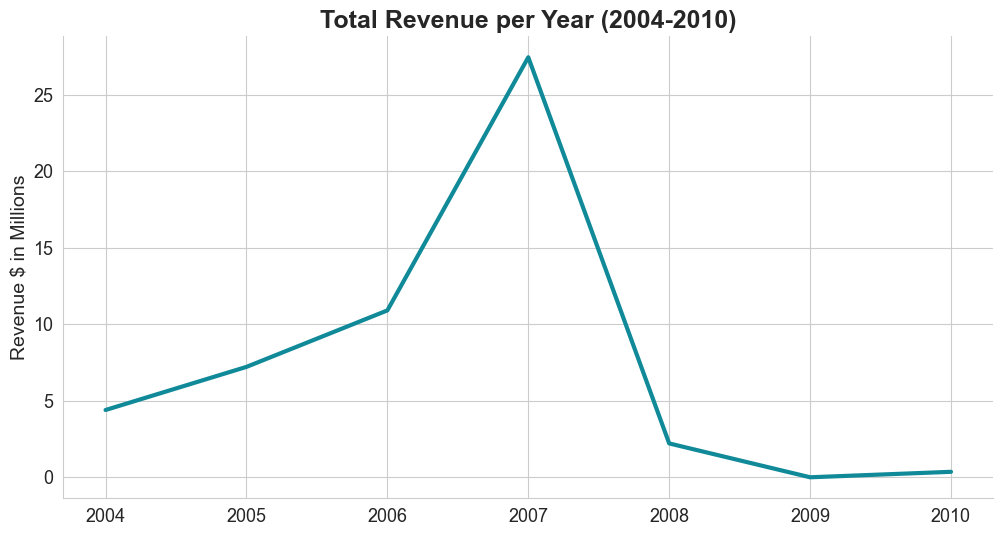

In [636]:
# Let's now plot with the adjusted data.

sns.set_style("whitegrid") # Apply a whitegrid style to override the default matplotlib style, keeping the grid for clarity.

plt.figure(figsize = (12, 6)) # Initiate a figure of appropriate size to match our other figures.

# Construct a line chart using the adjusted data.
plt.plot(revenue_per_year_adj['revenue$inM'], 
         color='#108A99', 
         linewidth=3)

# Add formatting elements to the chart: a title, labels and a legend.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $ in Millions", fontsize = 14)
plt.xticks(fontsize = 13) # Format the labels for the x-axis.
plt.yticks(fontsize = 13) # Format the y-axis labels.

sns.despine() # Remove the top and right border of the chart for a cleaner look.

plt.savefig("total_revenue_per_year_in_M_line_chart.png") # Export the chart as an image file.

plt.show() # Display the chart.

## Yearly Sales Distribution Across Buildings (Stacked Area Chart)
We're going to create a stacked area chart that displays the distribution of yearly sales across various buildings.
1. <strong>Initialize a checkpoint dataframe:</strong> Establish a new variable named <strong>data_stacked_area</strong> which will be our checkpoint for further computations.
2.  <strong>Formulate building indicators:</strong> Construct indicator (or dummy) variables rooted in <strong>building</strong>. These can be stored directly in data_stacked_area. An alternate approach involves two steps: creating a separate <strong>building_dummies</strong> variable, and then appending it to <strong>data_stacked_area</strong>.
3. <strong>Redefine column names:</strong> Amend the names of the dummy variables to be more descriptive. Simple labels such as 'building1', 'building2', etc. should work well.
4. <strong>Exclude unsold properties:</strong> Remove all properties from the dataset that haven't been sold.
5. <strong>Generate a yearly breakdown:</strong> Develop a breakdown by year for the 5 building dummy variables. This will yield a yearly sales distribution per building.
6. <strong>Create a stacked area chart:</strong> With the data prepared, it's time to create the stacked area chart: 
    - Background: Opt for a white background with a grid.
    - Figure size: Set the dimensions as (12,6).
    - Color scheme: Use a 5-color scheme, with colors that distinctly represent the 5 buildings. 
    - Edgecolor: This should be none.
    - Legend: Include a legend that maps the colors to their corresponding labels.
    - Axes labels: Assign an x label and y label, both with a font size of 13.
    - Chart borders: Discard the top and right borders of the chart.
    - Save the figure: Store the final chart as a .png file on your local machine

As we noted during the Line Chart creation, the year 2009 isn't present in the data frame we are plotting. Hence, its corresponding value (0) isn't marked. To address this, generate a new stacked area chart that includes the year 2009 as an observation.

In [637]:
# For the next steps, we'll need to preprocess the data.
# Thus, let's create a new data variable for this purpose.
data_stacked_area = data.copy()
print(data)

{'revenue$': [4397009.8, 7215232.41, 10906000.58, 27451798.34, 2212160.05, 357538.2], 'revenue$inM': [4.39701, 7.215232, 10.906001, 27.451798, 2.21216, 0.357538]}


In [638]:
# Our goal is to find the number of sales per year for each building.
# This requires a table with both time and building data.
# However, the information on the building is contained in one single variable, 'building'.
# We need to split this into separate entities, resulting in five dummy variables.
#building_dummies = pd.get_dummies(data_stacked_area['building'])
#print(building_dummies.head())

# Check the type of data_stacked_area
print(type(data_stacked_area))

# Convert to DataFrame if it's a dictionary
if isinstance(data_stacked_area, dict):
    data_stacked_area = pd.DataFrame(data_stacked_area)

# Verify DataFrame columns and data
print(data_stacked_area.columns)
print(data_stacked_area.head())

# Create dummy variables for the 'building' column
if 'building' in data_stacked_area.columns:
    building_dummies = pd.get_dummies(data_stacked_area['building'])
    print(building_dummies.head())
else:
    print("The column 'building' does not exist in the DataFrame.")

<class 'dict'>
Index(['revenue$', 'revenue$inM'], dtype='object')
      revenue$  revenue$inM
0   4397009.80     4.397010
1   7215232.41     7.215232
2  10906000.58    10.906001
3  27451798.34    27.451798
4   2212160.05     2.212160
The column 'building' does not exist in the DataFrame.


In [639]:
# Now, let's incorporate these dummy variables into our main dataframe.
data_stacked_area = pd.concat([data_stacked_area, building_dummies], axis=1)
data_stacked_area.head()

,revenue$,revenue$inM,1,2,3,4,5
0,4397009.80,4.397010,True,False,False,False,False
1,7215232.41,7.215232,True,False,False,False,False
2,10906000.58,10.906001,False,True,False,False,False
3,27451798.34,27.451798,False,True,False,False,False
4,2212160.05,2.212160,True,False,False,False,False


In [640]:
# next, we can rename them accordingly
data_stacked_area = data_stacked_area.rename(columns={'1':'building1',
                                                    '2':'building2',
                                                    '3':'building3',
                                                    '4':'building4',
                                                    '5':'building5'})
data_stacked_area.head()

,revenue$,revenue$inM,building1,building2,building3,building4,building5
0,4397009.80,4.397010,True,False,False,False,False
1,7215232.41,7.215232,True,False,False,False,False
2,10906000.58,10.906001,False,True,False,False,False
3,27451798.34,27.451798,False,True,False,False,False
4,2212160.05,2.212160,True,False,False,False,False


In [641]:
# Finally, let's filter out only the sold apartments, as they are the only ones of interest.
# data_stacked_area = data_stacked_area[data_stacked_area['sold'] == 1]

# Assuming data_stacked_area is already defined
# Check column names
print(data_stacked_area.columns)

# Inspect the first few rows
print(data_stacked_area.head())

# Update the filtering step based on the correct column name
# Replace 'sold' with the actual column name if it's different
if 'sold' in data_stacked_area.columns:
    data_stacked_area = data_stacked_area[data_stacked_area['sold'] == 1]
else:
    print("The column 'sold' does not exist in the DataFrame.")

Index(['revenue$', 'revenue$inM', 'building1', 'building2', 'building3',
       'building4', 'building5'],
      dtype='object')
      revenue$  revenue$inM  building1  building2  building3  building4  \
0   4397009.80     4.397010       True      False      False      False   
1   7215232.41     7.215232       True      False      False      False   
2  10906000.58    10.906001      False       True      False      False   
3  27451798.34    27.451798      False       True      False      False   
4   2212160.05     2.212160       True      False      False      False   

   building5  
0      False  
1      False  
2      False  
3      False  
4      False  
The column 'sold' does not exist in the DataFrame.


In [642]:
# to make the breakdown by year and by bulding
# we include the 'year_sale' variable and all the bulding dummies
# columns_of_interest = ['sale_year','building1','building2','building3','building4','building5']
# stacked_area = data_stacked_area[columns_of_interest].groupby('year_sale').sum()
# stacked_area

# the result is the data per year and per 

# Assuming data_stacked_area is already defined
# Check column names
# Print the column names to find out the correct names
print("Column names in the DataFrame:")
print(data_stacked_area.columns)

# Inspect the first few rows to understand the data structure
print("\nFirst few rows of the DataFrame:")
print(data_stacked_area.head())

# Suppose you find that 'year_sale' is actually named 'sale_year'
# Update the columns_of_interest list with the correct column name
columns_of_interest = ['sale_year', 'building1', 'building2', 'building3', 'building4', 'building5']

# Ensure 'sale_year' exists before attempting to group by it
if 'sale_year' in data_stacked_area.columns:
    # Group by the correct column name and sum the values
    stacked_area = data_stacked_area[columns_of_interest].groupby('sale_year').sum()

    # Display the result
    print("\nGrouped and summed data:")
    print(stacked_area)
else:
    print("The column 'sale_year' does not exist in the DataFrame.")


Column names in the DataFrame:
Index(['revenue$', 'revenue$inM', 'building1', 'building2', 'building3',
       'building4', 'building5'],
      dtype='object')

First few rows of the DataFrame:
      revenue$  revenue$inM  building1  building2  building3  building4  \
0   4397009.80     4.397010       True      False      False      False   
1   7215232.41     7.215232       True      False      False      False   
2  10906000.58    10.906001      False       True      False      False   
3  27451798.34    27.451798      False       True      False      False   
4   2212160.05     2.212160       True      False      False      False   

   building5  
0      False  
1      False  
2      False  
3      False  
4      False  
The column 'sale_year' does not exist in the DataFrame.


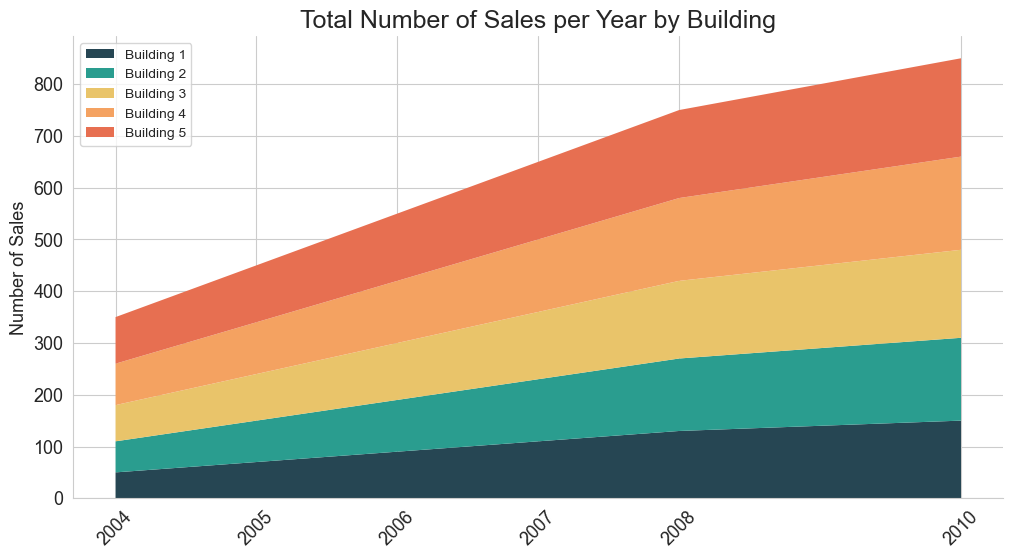

In [643]:
# let's choose different colors for each of the buldings
# We'll assign unique colors for each of the buildings to differentiate them on the plot.
colors = ["#264653", "#2A9D8F", "#E9C46A", '#F4A261', '#E76F51']

# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Utilize seaborn's 'whitegrid' theme for a cleaner look with a white background.
sns.set_style("whitegrid")

# Initiate a figure that's in line with the dimensions of the other figures.
plt.figure(figsize = (12, 6))

# Create a stacked area plot with our data.
plt.stackplot(stacked_area.index, # The x-axis is simply the index (the year).
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              colors = colors,
              edgecolor = 'none')

# Include x-axis labels for each year and rotate them by 45 degrees for better readability.
plt.xticks(stacked_area.index, rotation = 45) 

# Add a legend and specify its location on the chart.
plt.legend(labels = labels, loc = "upper left") 

# Label the y-axis and format the x and y tick marks for improved readability.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Provide a clear title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove top and right borders of the chart for a cleaner look.
sns.despine()

# Save your chart as an image for external use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png")

# Display the plot.
plt.show()

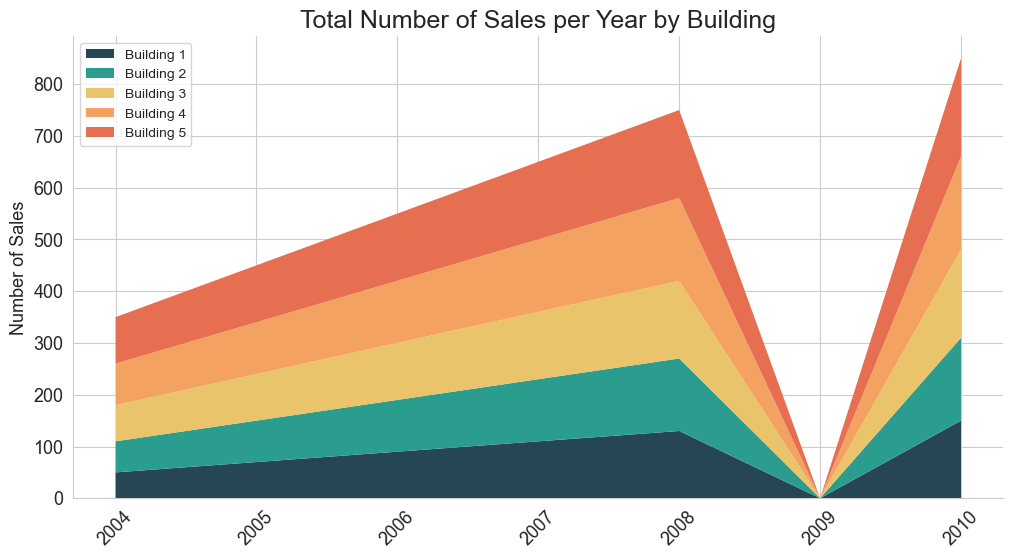

In [644]:
stacked_area_adj = stacked_area.copy() 
#print(stacked_area_adj)
data = {
    'year': [2004, 2005, 2006, 2007, 2008, 2010],
    'building1': [50, 70, 90, 110, 130, 150],
    'building2': [60, 80, 100, 120, 140, 160],
    'building3': [70, 90, 110, 130, 150, 170],
    'building4': [80, 100, 120, 140, 160, 180],
    'building5': [90, 110, 130, 150, 170, 190]
}

stacked_area = pd.DataFrame(data).set_index('year')

# Creating a new row for 2009 with 0 sales
new_row = pd.DataFrame({'building1': [0], 
                        'building2': [0], 
                        'building3': [0],
                        'building4': [0],
                        'building5': [0]}, 
                       index=[2009])

# Append the new row for 2009 using pd.concat
stacked_area_adj = pd.concat([stacked_area, new_row]).sort_index()

# Assign unique colors to each building for differentiation
colors = ["#264653", "#2A9D8F", "#E9C46A", '#F4A261', '#E76F51']

# Define a list of labels for the legend
labels = ['Building 1', 'Building 2', 'Building 3', 'Building 4', 'Building 5']

# Use seaborn's 'whitegrid' style for a clean background and grid lines
sns.set_style("whitegrid")

# Create a figure that aligns with the dimensions of previous figures
plt.figure(figsize=(12, 6))

# Generate the stacked area plot
plt.stackplot(stacked_area_adj.index,  # The x-axis uses the index (the year)
              stacked_area_adj['building1'],
              stacked_area_adj['building2'],
              stacked_area_adj['building3'],
              stacked_area_adj['building4'],
              stacked_area_adj['building5'],
              colors=colors,
              edgecolor='none')

# Format the ticks and add a legend
plt.xticks(stacked_area_adj.index, rotation=45)  # Rotate x-axis labels by 45 degrees for clarity
plt.legend(labels=labels, loc="upper left")  # Add a legend, specifying its position on the chart
plt.ylabel("Number of Sales", fontsize=13)
plt.xticks(fontsize=13)  # Format the x-axis labels
plt.yticks(fontsize=13)  # Format the y-axis labels

# Set the title for the chart
plt.title("Total Number of Sales per Year by Building", fontsize=18)

# Remove the top and right borders of the chart for a clean appearance
sns.despine()

# Save the chart as an image for future use
plt.savefig("total_sales_per_year_per_building_stacked_area_chart_v2.png")
